In [222]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
poverty=pd.read_csv('poverty.csv')
crime=pd.read_csv('crime.csv',skiprows=3)
police_violence=pd.read_csv('police_violence.csv')

In [224]:
def remove(city):
    return ' '.join(city.split()[:-1])
poverty['city']=poverty['City'].apply(remove)
df_poverty=poverty[['city','Total percent below poverty','State']]

In [225]:
crime=crime[['Counties/principal cities','Population','Violent\ncrime']].dropna()
crime['mask']=np.where(crime['Counties/principal cities'].str.contains('City'),True,False)
df_crime=crime[crime['mask']]
df_crime
def revise(city):
    city=city.split(',')[0]
    city=city.split()[2:]
    return ' '.join(city)
df_crime['city']=df_crime['Counties/principal cities'].apply(revise)
def str2int(nums):
    nums=''.join(nums.split(','))
    return int(nums)
df_crime['violent_crime']=df_crime['Violent\ncrime'].apply(str2int)
df_crime['population']=df_crime['Population'].apply(str2int)
df_crime=df_crime[['city','violent_crime','population']]

df_crime['voilent_crime_rate']=df_crime['violent_crime']/df_crime['population']*100


C:\Users\Dailey\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Dailey\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Dailey\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

In [226]:
df_violence=police_violence[['City','Police Killings 2016']]
df=pd.merge(df_poverty,pd.merge(df_crime,df_violence,left_on='city',right_on='City'),left_on='city',right_on='city')
df=df.drop('City',axis=1)
df_0=df[['city','State','Total percent below poverty','voilent_crime_rate','Police Killings 2016']]
df_0

,city,State,Total percent below poverty,voilent_crime_rate,Police Killings 2016
0,Detroit,Michigan,35.7,2.046521,1.0
1,Cleveland,Ohio,35.0,0.864417,0.0
2,Cleveland,Ohio,35.0,1.630906,0.0
3,Fresno,California,28.1,0.610904,2.0
4,Memphis,Tennessee,26.9,1.819985,3.0
5,Milwaukee,Wisconsin,26.7,1.533007,3.0
6,Philadelphia,Pennsylvania,25.7,0.988906,5.0
7,Miami,Florida,24.9,0.887492,1.0
8,Tucson,Arizona,24.1,0.795446,5.0
9,St. Louis,Missouri,23.8,1.913153,5.0


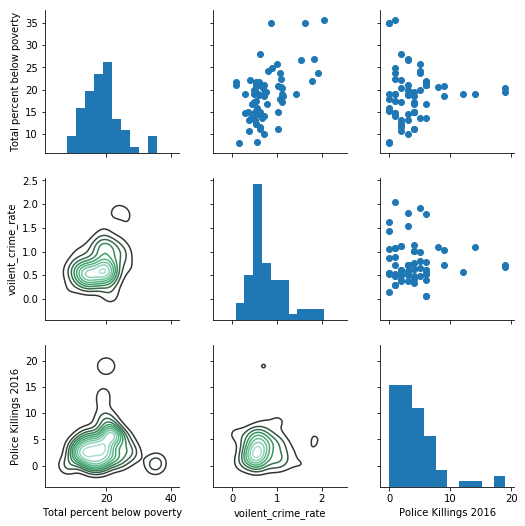

In [227]:
g=sns.PairGrid(df_0)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.show()

C:\Users\Dailey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


['Michigan', 'Ohio', 'Ohio', 'California', 'Tennessee']


C:\Users\Dailey\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


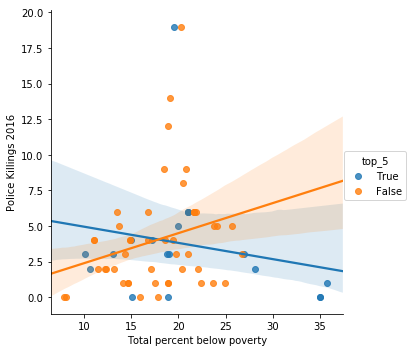

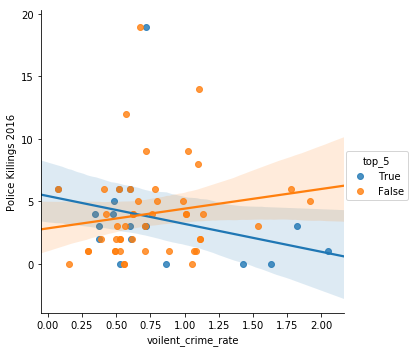

In [228]:
df_0.sort_index(by='Police Killings 2016',ascending=False)
top_5=list(df_0['State'][:5])
print(top_5)
def top5(state):
    if state in top_5:
        return 'True'
    return 'False'
df_2=df_0

df_2['top_5']=df_2['State'].apply(top5)
sns.lmplot(x='Total percent below poverty',y='Police Killings 2016',data=df_2,hue='top_5')
sns.lmplot(x='voilent_crime_rate',y='Police Killings 2016',data=df_2,hue='top_5')
plt.show()
